# About Dataset : 
* This dataset contains all purchases made for an online retail company based in the UK during an eight month period.

# Data Description:

Attribute Information:

•InvoiceNo: Invoice number. Nominal, a 6-digit integral number uniquely assigned to each transaction. If this code starts with letter 'c', it indicates a cancellation.

•StockCode: Product (item) code. Nominal, a 5-digit integral number uniquely assigned to each distinct product.

• Description: Product (item) name. Nominal.

• Quantity: The quantities of each product (item) per transaction. Num

• InvoiceDate: Invice Date and time. Numeric, the day and time when transaction was generated.

• UnitPrice: Unit price. Numeric, Product price per unit in sterling.

• CustomerID: Customer number. Nominal, a 5-digit integral number uniquely assigned to each customer.

• Country: Country name. Nominal, the name of the country where each customer resides.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

import warnings
warnings.filterwarnings("ignore")

In [2]:
data = pd.read_csv("D:\\Data Science\\data science project for github\\clustering problem\\online Retail\\OnlineRetail.csv", encoding='ISO-8859-1')
data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [3]:
data.describe()

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [5]:
data['InvoiceNo'].unique()

array(['536365', '536366', '536367', ..., '581585', '581586', '581587'],
      dtype=object)

In [6]:
data.describe(include=['number']).T


,count,mean,std,min,25%,50%,75%,max
Quantity,541909.0,9.552250,218.081158,-80995.00,1.00,3.00,10.00,80995.0
UnitPrice,541909.0,4.611114,96.759853,-11062.06,1.25,2.08,4.13,38970.0
CustomerID,406829.0,15287.690570,1713.600303,12346.00,13953.00,15152.00,16791.00,18287.0


In [7]:
data.describe(include=['object']).T

,count,unique,top,freq
InvoiceNo,541909,25900,573585,1114
StockCode,541909,4070,85123A,2313
Description,540455,4223,WHITE HANGING HEART T-LIGHT HOLDER,2369
InvoiceDate,541909,23260,10/31/2011 14:41,1114
Country,541909,38,United Kingdom,495478


In [8]:
missing_df = data.isna().sum().sort_values(ascending=False).to_frame(name='Missing value')
missing_df['Ratio'] = missing_df/len(data)
missing_df

,Missing value,Ratio
CustomerID,135080,0.249267
Description,1454,0.002683
InvoiceNo,0,0.000000
StockCode,0,0.000000
Quantity,0,0.000000
InvoiceDate,0,0.000000
UnitPrice,0,0.000000
Country,0,0.000000


In [9]:
# set to datetime
data['InvoiceDate'] = pd.to_datetime(data['InvoiceDate'])
data['InvoiceDate'].dtype

dtype('<M8[ns]')

In [10]:
data = data.dropna(subset=['CustomerID'])
data.shape

(406829, 8)

In [11]:
# orders that have been cancelled
cancelled_order = data[data['InvoiceNo'].str.startswith('C')]
len(cancelled_order)

8905

 * Removes rows that do not have a customer ID

In [12]:
data= data.dropna(subset=['CustomerID'])
data.isna().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

In [13]:
data.dtypes

InvoiceNo              object
StockCode              object
Description            object
Quantity                int64
InvoiceDate    datetime64[ns]
UnitPrice             float64
CustomerID            float64
Country                object
dtype: object

In [14]:
#data['CustomerID']= data['CustomerID'].astype(str)

# Monetary

In [15]:
# create new column called monetary
data['Monetary'] = data['UnitPrice'] * data['Quantity']


monetary = data.groupby('CustomerID')['Monetary'].sum()

monetary = monetary.reset_index()
monetary.head()

,CustomerID,Monetary
0,12346.0,0.00
1,12347.0,4310.00
2,12348.0,1797.24
3,12349.0,1757.55
4,12350.0,334.40


# Frequency

* create new attribute that is frequency

In [16]:
frequency = data.groupby('CustomerID')['InvoiceNo'].count()
frequency = frequency.reset_index()

frequency.columns=['CustomerID','Frequency']
frequency.head()

,CustomerID,Frequency
0,12346.0,2
1,12347.0,182
2,12348.0,31
3,12349.0,73
4,12350.0,17


* create new attribute that is Recency

In [17]:
data['InvoiceDate']= pd.to_datetime(data['InvoiceDate'])

max_date = max(data['InvoiceDate'])

data['Recency'] = max_date - data['InvoiceDate']

recency = data.groupby('CustomerID')['Recency'].min()
recency = recency.reset_index()


recency['Recency'] = recency['Recency'].dt.days
recency.head()

,CustomerID,Recency
0,12346.0,325
1,12347.0,1
2,12348.0,74
3,12349.0,18
4,12350.0,309


* merge recency,frequency,monetary

In [18]:
# merge all three dataframe
df_temp = pd.merge(monetary, frequency, on='CustomerID', how='inner')
             
df = pd.merge(df_temp, recency, on='CustomerID', how='inner')

df.head()

,CustomerID,Monetary,Frequency,Recency
0,12346.0,0.00,2,325
1,12347.0,4310.00,182,1
2,12348.0,1797.24,31,74
3,12349.0,1757.55,73,18
4,12350.0,334.40,17,309


# Handling Outliers

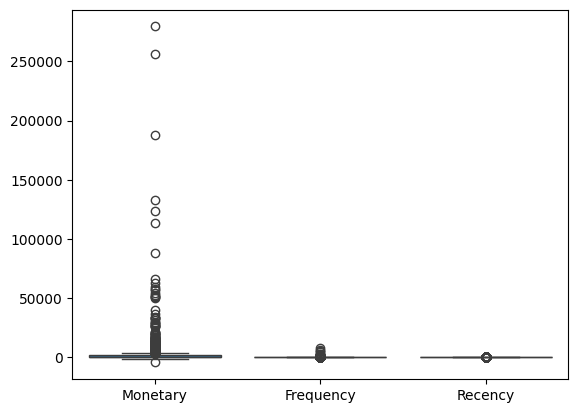

In [19]:
# botplot to see outliers
sns.boxplot(data=df[['Monetary', 'Frequency', 'Recency']])
plt.show()

In [20]:
# remove outliers

num_cols = ['Monetary', 'Frequency', 'Recency']

df_cleaned = df.copy()

for col in num_cols:

    Q1 = df_cleaned[col].quantile(0.05)
    Q3 = df_cleaned[col].quantile(0.95)
    IQR = Q3 - Q1


    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR


    df_cleaned = df_cleaned[(df_cleaned[col] >= lower_bound) & (df_cleaned[col] <= upper_bound)]

print(df_cleaned.shape)

(4293, 4)


# Scaling data

In [21]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

df_scaled = scaler.fit_transform(df_cleaned)
df_scaled.shape

(4293, 4)

# Model

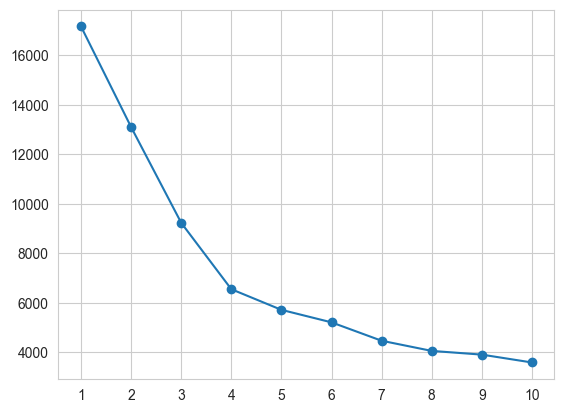

In [22]:
# ploting the elbow curve to find out the number of clusters

sse = []

for k in range(1,11):
    kmeans = KMeans(n_clusters=k , max_iter=10)
    kmeans.fit(df_scaled)
    
    sse.append(kmeans.inertia_)
    
    
sns.set_style('whitegrid')
plt.plot(range(1,11),sse,'-o')
plt.xticks(range(1,11))

plt.show()

In [23]:
model = KMeans(n_clusters=3 , max_iter=100)
model.fit(df_scaled)

labels = model.predict(df_scaled)

In [24]:
df_cleaned['label'] = labels
df_cleaned.head()

,CustomerID,Monetary,Frequency,Recency,label
0,12346.0,0.00,2,325,2
1,12347.0,4310.00,182,1,0
2,12348.0,1797.24,31,74,1
3,12349.0,1757.55,73,18,1
4,12350.0,334.40,17,309,2


In [25]:
model.cluster_centers_

array([[-0.14215401,  2.08534534,  2.09736368, -0.69891629],
       [ 0.00434152, -0.17977209, -0.17586367, -0.47704408],
       [ 0.05446702, -0.50244871, -0.51797624,  1.54104127]])

# plot clusters

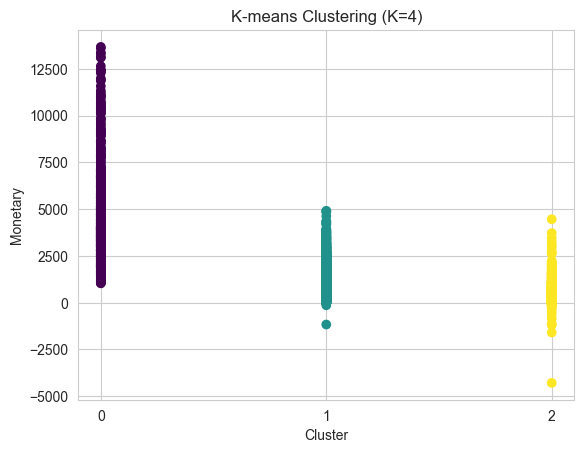

In [26]:
plt.scatter(x='label', y='Monetary',data=df_cleaned , c=model.labels_ , cmap='viridis')

plt.xlabel('Cluster')
plt.ylabel('Monetary')
plt.xticks(range(int(df_cleaned['label'].min()), int(df_cleaned['label'].max()) + 1))
plt.title(f'K-means Clustering (K={4})')
plt.show()

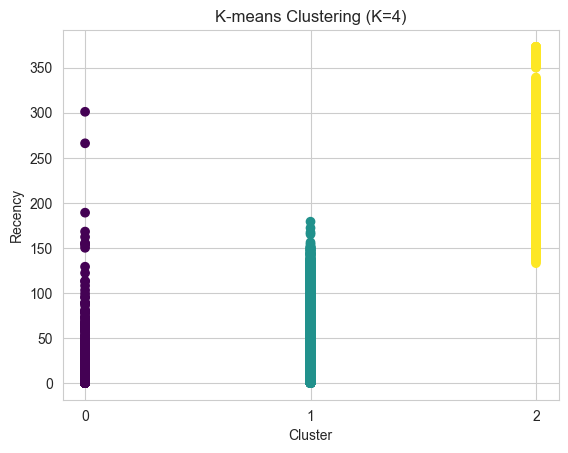

In [27]:
plt.scatter(x='label', y='Recency',data=df_cleaned , c=model.labels_ , cmap='viridis')

plt.xlabel('Cluster')
plt.ylabel('Recency')
plt.xticks(range(int(df_cleaned['label'].min()), int(df_cleaned['label'].max()) + 1))
plt.title(f'K-means Clustering (K={4})')
plt.show()

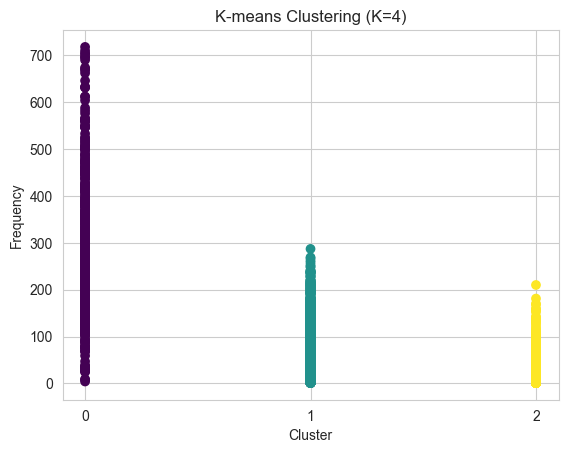

In [28]:
plt.scatter(x='label', y='Frequency',data=df_cleaned , c=model.labels_ , cmap='viridis')

plt.xlabel('Cluster')
plt.ylabel('Frequency')
plt.xticks(range(int(df_cleaned['label'].min()), int(df_cleaned['label'].max()) + 1))
plt.title(f'K-means Clustering (K={4})')
plt.show()